In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

import plotly.graph_objects as go
import plotly.express as px

In [2]:
data=pd.read_csv('IRIS.csv')

In [3]:
data.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [4]:
data.tail()

sepal_length  sepal_width  petal_length  petal_width         species
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe(include='object').T

count unique          top freq
species   150      3  Iris-setosa   50

In [7]:
fig = px.bar(data, x='species')
fig.show()

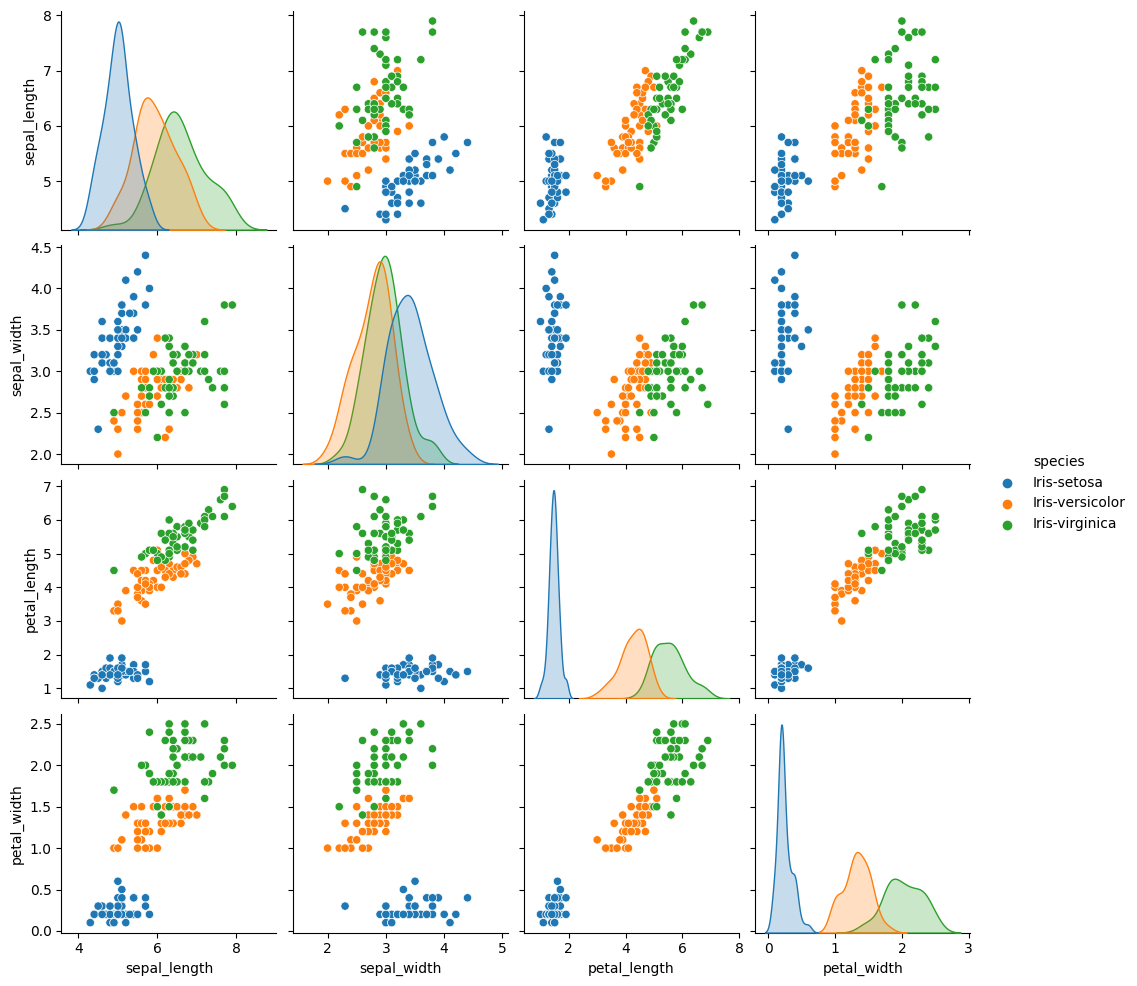

In [8]:
sns.pairplot(data, hue='species')
plt.show()

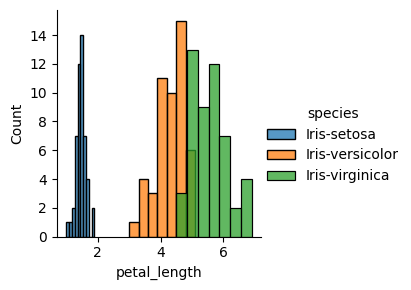

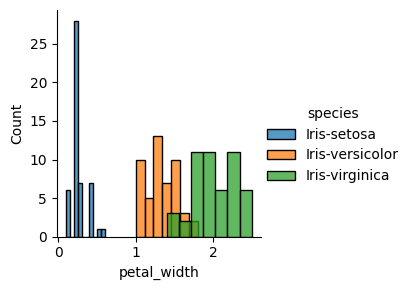

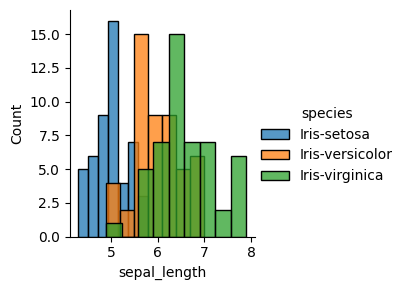

In [9]:
g1=sns.FacetGrid(data,hue='species')
g1.map(sns.histplot,'petal_length')
g1.add_legend()

g2=sns.FacetGrid(data,hue='species')
g2.map(sns.histplot,'petal_width')
g2.add_legend()

g3=sns.FacetGrid(data,hue='species')
g3.map(sns.histplot,'sepal_length')
g3.add_legend()

plt.show()


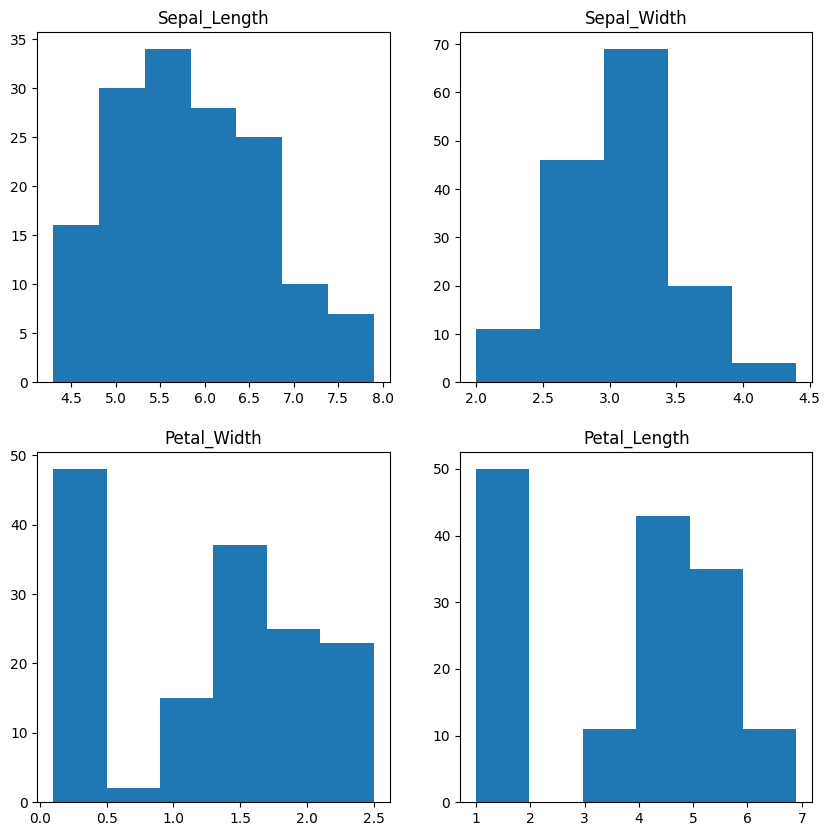

In [10]:
fig, axes = plt.subplots(2,2, figsize=(10,10))

axes[0,0].set_title('Sepal_Length')
axes[0,0].hist(data['sepal_length'],bins=7)

axes[0,1].set_title('Sepal_Width')
axes[0,1].hist(data['sepal_width'], bins=5)

axes[1,0].set_title('Petal_Width')
axes[1,0].hist(data['petal_width'], bins=6)

axes[1,1].set_title('Petal_Length')
axes[1,1].hist(data['petal_length'], bins=6)

plt.show()

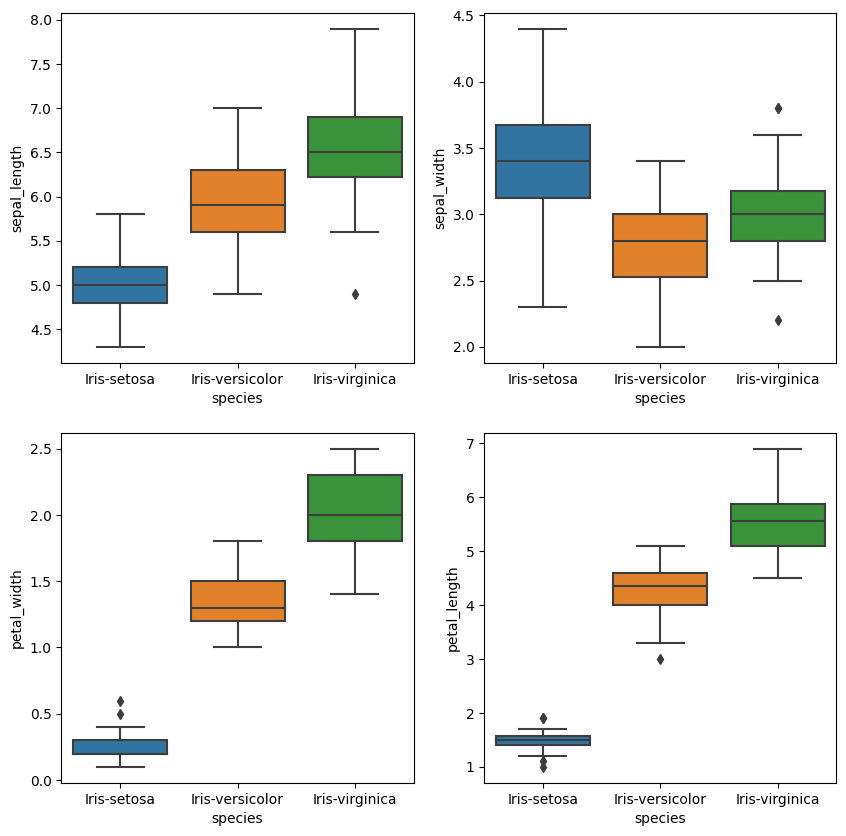

In [11]:
def graph(y):
    sns.boxplot(x='species', y=y, data=data)
    
plt.figure(figsize=(10,10))

plt.subplot(221)
graph('sepal_length')

plt.subplot(222)
graph('sepal_width')

plt.subplot(223)
graph('petal_width')

plt.subplot(224)
graph('petal_length')

plt.show()

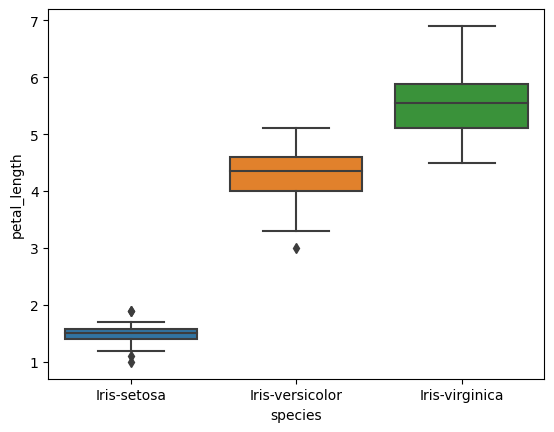

In [12]:
sns.boxplot(x='species', y='petal_length', data=data)
plt.show()

In [13]:
corrMatrix=data[['petal_length','petal_width','sepal_length','sepal_width']].corr()
corrMatrix

petal_length  petal_width  sepal_length  sepal_width
petal_length      1.000000     0.962757      0.871754    -0.420516
petal_width       0.962757     1.000000      0.817954    -0.356544
sepal_length      0.871754     0.817954      1.000000    -0.109369
sepal_width      -0.420516    -0.356544     -0.109369     1.000000

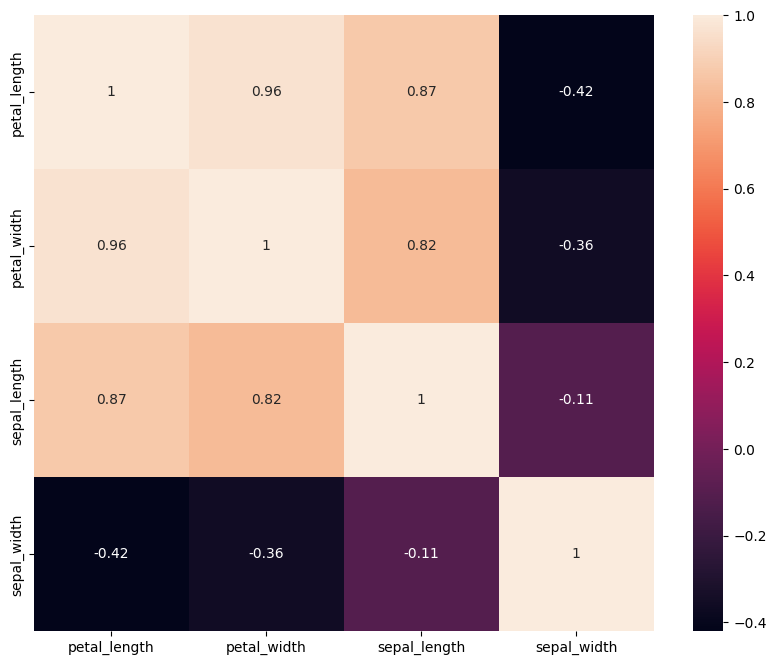

In [14]:
fig, plt.figure(figsize=(10,8))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [15]:
df=data.copy()

In [16]:
df.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [17]:
x=df.drop('species', axis=1)

In [18]:
x.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [19]:
y=df['species']

In [20]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [21]:
label_encoder=LabelEncoder()

In [22]:
y=label_encoder.fit_transform(y)

In [23]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [25]:
print(x_train.shape, x_test.shape,y_test.shape,y_train.shape)

(120, 4) (30, 4) (30,) (120,)


In [26]:
model = tf.keras.Sequential([
#     tf.keras.layers.Dense(3, activation='softmax', input_shape=(4,))
    tf.keras.layers.Dense(3, activation='softmax', input_shape=(x_train.shape[1],))
])

In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
print('Neural Network Model Summary: ')
print(model.summary())

Neural Network Model Summary: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
None


In [40]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)
history=model.fit(x_train,y_train, epochs=200, batch_size=16,validation_data=(x_test,y_test), callbacks=[early_stop])

Epoch 1/200
8/8 [==============================] - 0s 9ms/step - loss: 0.3750 - accuracy: 0.9500 - val_loss: 0.3711 - val_accuracy: 0.9667
Epoch 2/200
8/8 [==============================] - 0s 5ms/step - loss: 0.3744 - accuracy: 0.9500 - val_loss: 0.3712 - val_accuracy: 1.0000
Epoch 3/200
8/8 [==============================] - 0s 5ms/step - loss: 0.3735 - accuracy: 0.9500 - val_loss: 0.3709 - val_accuracy: 1.0000
Epoch 4/200
8/8 [==============================] - 0s 5ms/step - loss: 0.3729 - accuracy: 0.9500 - val_loss: 0.3702 - val_accuracy: 1.0000
Epoch 5/200
8/8 [==============================] - 0s 5ms/step - loss: 0.3722 - accuracy: 0.9500 - val_loss: 0.3692 - val_accuracy: 1.0000
Epoch 6/200
8/8 [==============================] - 0s 5ms/step - loss: 0.3715 - accuracy: 0.9500 - val_loss: 0.3688 - val_accuracy: 1.0000
Epoch 7/200
8/8 [==============================] - 0s 5ms/step - loss: 0.3715 - accuracy: 0.9500 - val_loss: 0.3668 - val_accuracy: 0.9667
Epoch 8/200
8/8 [==========

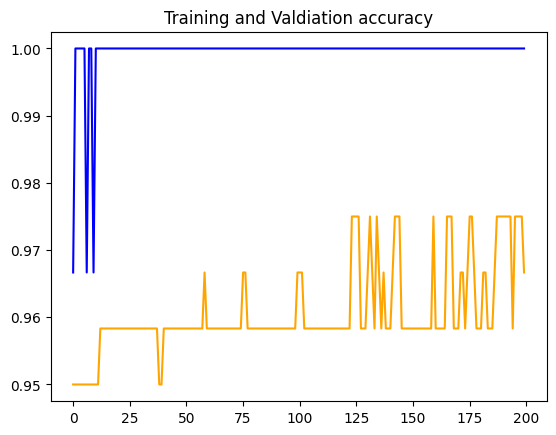

<Figure size 640x480 with 0 Axes>

In [41]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'orange', label='Training accuracy')
plt.plot(epochs,val_acc, 'blue', label='Validation accuracy')
plt.title('Training and Valdiation accuracy')
plt.figure()
plt.show()

In [42]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Model accuracy on test data: {accuracy * 100:.2f}%')

1/1 [==============================] - 0s 17ms/step - loss: 0.2726 - accuracy: 1.0000
Model accuracy on test data: 100.00%


In [43]:
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)
print("Model Accuracy: %.2f%%" % (accuracy*100))

1/1 [==============================] - 0s 17ms/step
Model Accuracy: 100.00%


In [47]:
model2=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=(4,),activation='relu',name='input'),
    tf.keras.layers.Dense(10,activation='relu',name='hidden'),
    tf.keras.layers.Dense(3,activation='softmax',name='output')
])

In [53]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [54]:
print('Neural Network Model Summary: ')
print(model2.summary())

Neural Network Model Summary: 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 10)                50        
                                                                 
 hidden (Dense)              (None, 10)                110       
                                                                 
 output (Dense)              (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None


In [55]:
History = model2.fit(x_train, y_train, epochs=200, batch_size=16,validation_data=(x_test, y_test),callbacks = [early_stop])

Epoch 1/200
8/8 [==============================] - 1s 21ms/step - loss: 4.5195 - accuracy: 0.3333 - val_loss: 4.2517 - val_accuracy: 0.3333
Epoch 2/200
8/8 [==============================] - 0s 5ms/step - loss: 4.0602 - accuracy: 0.3333 - val_loss: 3.7951 - val_accuracy: 0.3333
Epoch 3/200
8/8 [==============================] - 0s 5ms/step - loss: 3.6181 - accuracy: 0.3333 - val_loss: 3.3736 - val_accuracy: 0.3333
Epoch 4/200
8/8 [==============================] - 0s 5ms/step - loss: 3.2186 - accuracy: 0.3333 - val_loss: 2.9869 - val_accuracy: 0.3333
Epoch 5/200
8/8 [==============================] - 0s 5ms/step - loss: 2.8675 - accuracy: 0.3333 - val_loss: 2.6568 - val_accuracy: 0.3333
Epoch 6/200
8/8 [==============================] - 0s 5ms/step - loss: 2.5684 - accuracy: 0.3333 - val_loss: 2.4056 - val_accuracy: 0.3333
Epoch 7/200
8/8 [==============================] - 0s 5ms/step - loss: 2.3367 - accuracy: 0.3333 - val_loss: 2.1924 - val_accuracy: 0.3333
Epoch 8/200
8/8 [=========

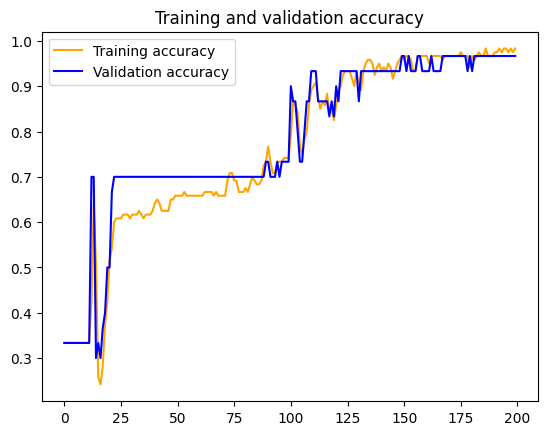

<Figure size 640x480 with 0 Axes>

In [56]:
acc = History.history['accuracy']
val_acc = History.history['val_accuracy']
loss = History.history['loss']
val_loss = History.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'orange', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [58]:
# Evaluate the model on the test data
loss, accuracy = model2.evaluate(x_test, y_test)
print(f'Model accuracy on test data: {accuracy * 100:.2f}%')

1/1 [==============================] - 0s 24ms/step - loss: 0.2175 - accuracy: 0.9667
Model accuracy on test data: 96.67%
